In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = "/content/drive/MyDrive/Tomato_leafs/plant disease"

In [3]:
train_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/train'

In [4]:
test_dir='/content/drive/MyDrive/Tomato_leafs/plant disease/valid'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [6]:
traindata=train.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1555 images belonging to 5 classes.


In [7]:
testdata=test.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 473 images belonging to 5 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def VGG19(input_shape, num_classes):
    model = tf.keras.Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Dense Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [9]:
input_shape = (128, 128, 3)
num_classes = 5

model = VGG19(input_shape, num_classes)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [11]:
import keras
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
var=model.fit(traindata,validation_data=testdata,epochs=5,batch_size=32)

Epoch 1/5
49/49 [==============================] - 1001s 20s/step - loss: 1.6103 - accuracy: 0.2077 - val_loss: 1.6074 - val_accuracy: 0.2093
Epoch 2/5
49/49 [==============================] - 14s 287ms/step - loss: 1.6079 - accuracy: 0.2141 - val_loss: 1.6050 - val_accuracy: 0.2093
Epoch 3/5
49/49 [==============================] - 14s 284ms/step - loss: 1.6087 - accuracy: 0.2141 - val_loss: 1.6062 - val_accuracy: 0.2093
Epoch 4/5
49/49 [==============================] - 14s 285ms/step - loss: 1.6062 - accuracy: 0.2302 - val_loss: 1.6053 - val_accuracy: 0.2093
Epoch 5/5
49/49 [==============================] - 14s 287ms/step - loss: 1.6059 - accuracy: 0.2141 - val_loss: 1.6045 - val_accuracy: 0.2093


In [14]:
import pandas as pd
df = pd.DataFrame(var.history)
df.head(50)

,loss,accuracy,val_loss,val_accuracy
0,1.610300,0.207717,1.607409,0.209302
1,1.607925,0.214148,1.605016,0.209302
2,1.608684,0.214148,1.606241,0.209302
3,1.606214,0.230225,1.605262,0.209302
4,1.605866,0.214148,1.604503,0.209302


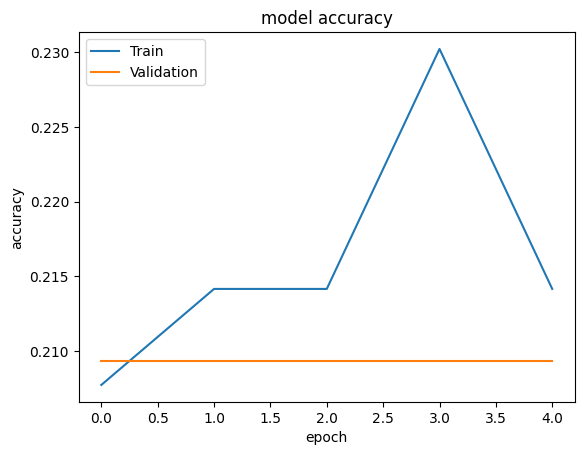

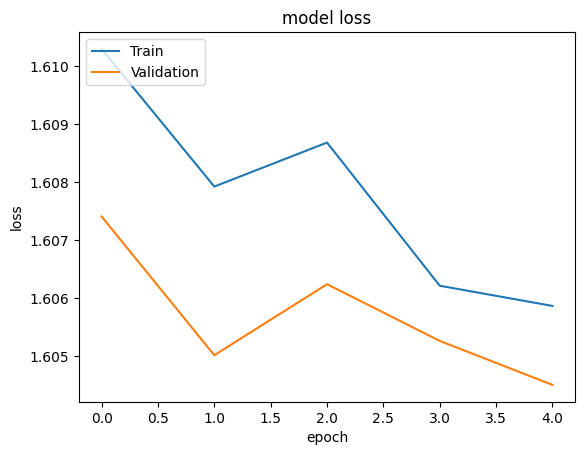

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(var.history['accuracy'])
plt.plot(var.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(var.history['loss'])
plt.plot(var.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

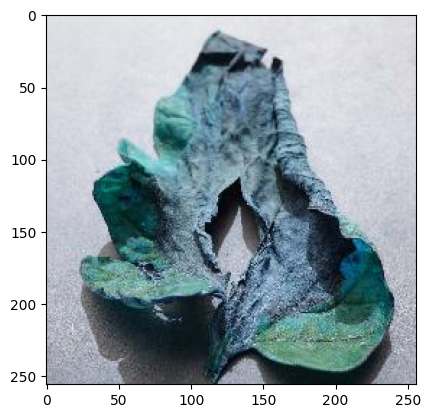

In [ ]:
import cv2

t=cv2.imread('/content/drive/MyDrive/Tomato_leafs/plant disease/valid/Tomato___Late_blight/bd10f32e-3a27-4a58-9def-62555e99b223___RS_Late.B 6768.JPG')
plt.imshow(t)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=model.predict(h)
classnames=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 1s 700ms/step


'Tomato___Late_blight'